In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

## DATA COLLECTION

In [2]:
#import dataset using Github link
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.head(20)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [4]:
df.tail(20)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
138,Congo (Brazzaville),Sub-Saharan Africa,139,3.989,0.06682,0.67866,0.66290,0.31051,0.41466,0.11686,0.12388,1.68135
139,Comoros,Sub-Saharan Africa,140,3.956,0.04797,0.23906,0.79273,0.36315,0.22917,0.19900,0.17441,1.95812
140,Uganda,Sub-Saharan Africa,141,3.931,0.04317,0.21102,1.13299,0.33861,0.45727,0.07267,0.29066,1.42766
141,Senegal,Sub-Saharan Africa,142,3.904,0.03608,0.36498,0.97619,0.43540,0.36772,0.10713,0.20843,1.44395
142,Gabon,Sub-Saharan Africa,143,3.896,0.04547,1.06024,0.90528,0.43372,0.31914,0.11091,0.06822,0.99895
143,Niger,Sub-Saharan Africa,144,3.845,0.03602,0.06940,0.77265,0.29707,0.47692,0.15639,0.19387,1.87877
144,Cambodia,Southeastern Asia,145,3.819,0.05069,0.46038,0.62736,0.61114,0.66246,0.07247,0.40359,0.98195
145,Tanzania,Sub-Saharan Africa,146,3.781,0.05061,0.28520,1.00268,0.38215,0.32878,0.05747,0.34377,1.38079
146,Madagascar,Sub-Saharan Africa,147,3.681,0.03633,0.20824,0.66801,0.46721,0.19184,0.08124,0.21333,1.85100
147,Central African Republic,Sub-Saharan Africa,148,3.678,0.06112,0.07850,0.00000,0.06699,0.48879,0.08289,0.23835,2.72230


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,158.0,79.493671,45.754363,1.00000,40.250000,79.500000,118.750000,158.00000
Happiness Score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
Standard Error,158.0,0.047885,0.017146,0.01848,0.037268,0.043940,0.052300,0.13693
Economy (GDP per Capita),158.0,0.846137,0.403121,0.00000,0.545808,0.910245,1.158448,1.69042
Family,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Health (Life Expectancy),158.0,0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
Trust (Government Corruption),158.0,0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191
Generosity,158.0,0.237296,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588
Dystopia Residual,158.0,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [7]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [8]:
#Removing dystopia residual column
df=df.drop(columns=['Dystopia Residual', 'Standard Error'])

In [9]:
df

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,Benin,Sub-Saharan Africa,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,Syria,Middle East and Northern Africa,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,Burundi,Sub-Saharan Africa,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


### Exploratory Data Analysis

In [10]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64


5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64


1.39651    1
0.39753    1
1.15406    1
1

In [11]:
#removing country and happiness rank column as each row has unique value and would be irrelevant for our analysis
df=df.drop(columns=['Country','Happiness Rank'])
df

,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...
153,Sub-Saharan Africa,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,Sub-Saharan Africa,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,Middle East and Northern Africa,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,Sub-Saharan Africa,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


#### Univariate analysis

In [12]:
df.columns

Index(['Region', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity'],
      dtype='object')

In [13]:
# Prepare list of columns names which contain numerical and categorical values
numerical_cols=['Happiness Score','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)', 'Generosity']
categorical_cols=['Region']

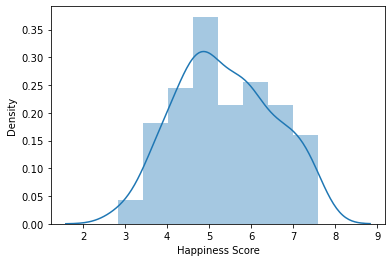

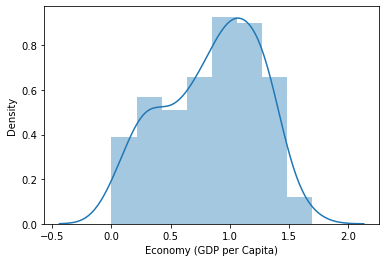

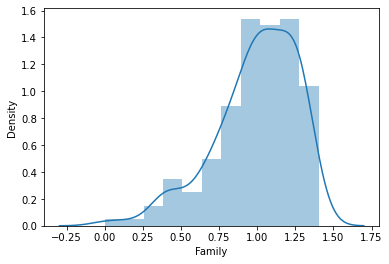

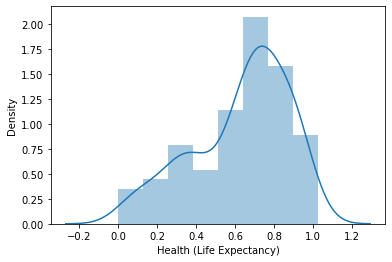

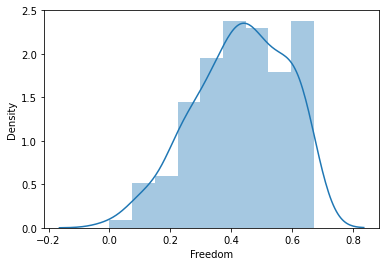

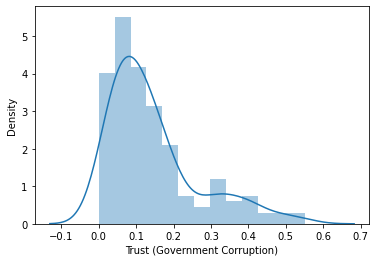

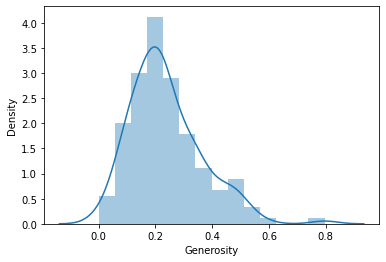

In [14]:
#Display distribution of all numrical_cols 
for i in numerical_cols:
    sns.distplot(df[i])
    plt.show()

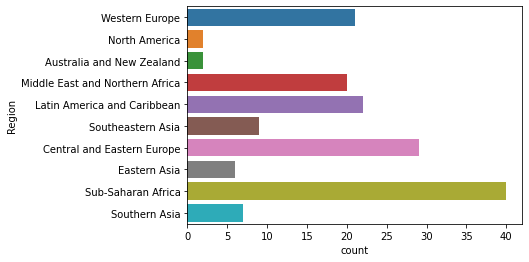

In [15]:
#Display value_counts of all categorical_cols 
for i in categorical_cols:
    sns.countplot(y=df[i])
    plt.show()

#### Bivariate Analysis

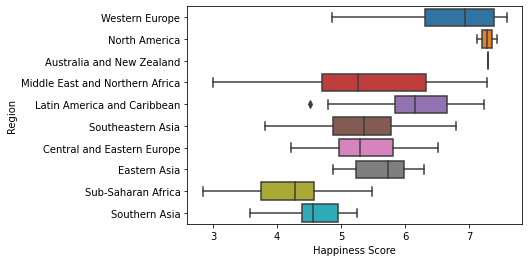

In [16]:
# For all categorical column compare the values ranges of charges(target variable)
for i in categorical_cols:
    sns.boxplot(x=df['Happiness Score'],y=df[i])
    plt.show()

Region looks like a good predictor because we can see the happiness score ranges are quite different across various regions.

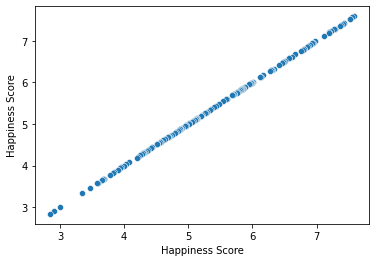

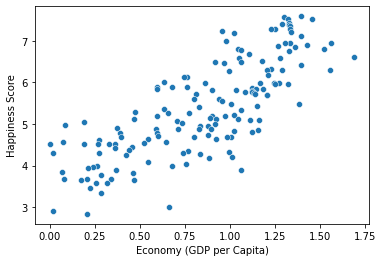

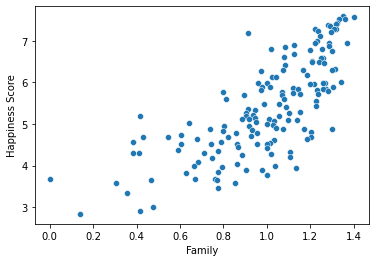

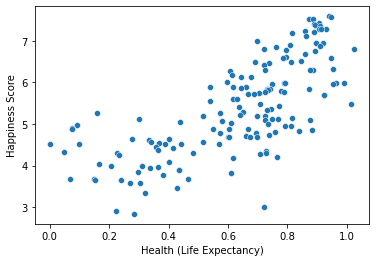

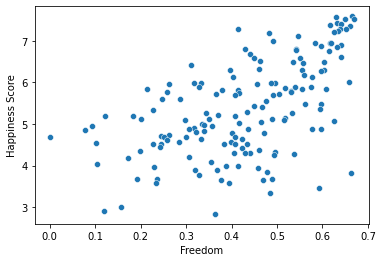

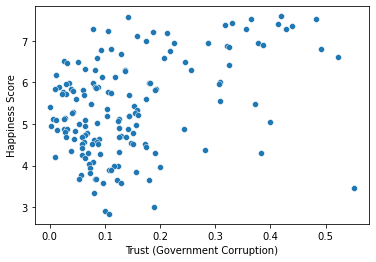

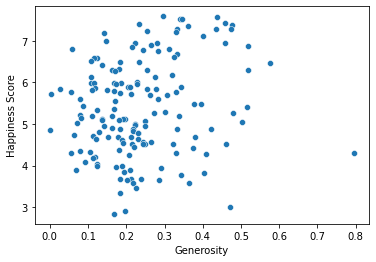

In [17]:
# for all numerical columns check how the chrges vary
for i in numerical_cols:
    sns.scatterplot(y=df['Happiness Score'],x=df[i])
    plt.show()

Economy(GDP per capita,Family,Health(Life Expectancy) could be considered as good predictors as they are generally increasing as the happiness score increases.

#### Multivariate Analysis

<AxesSubplot:>

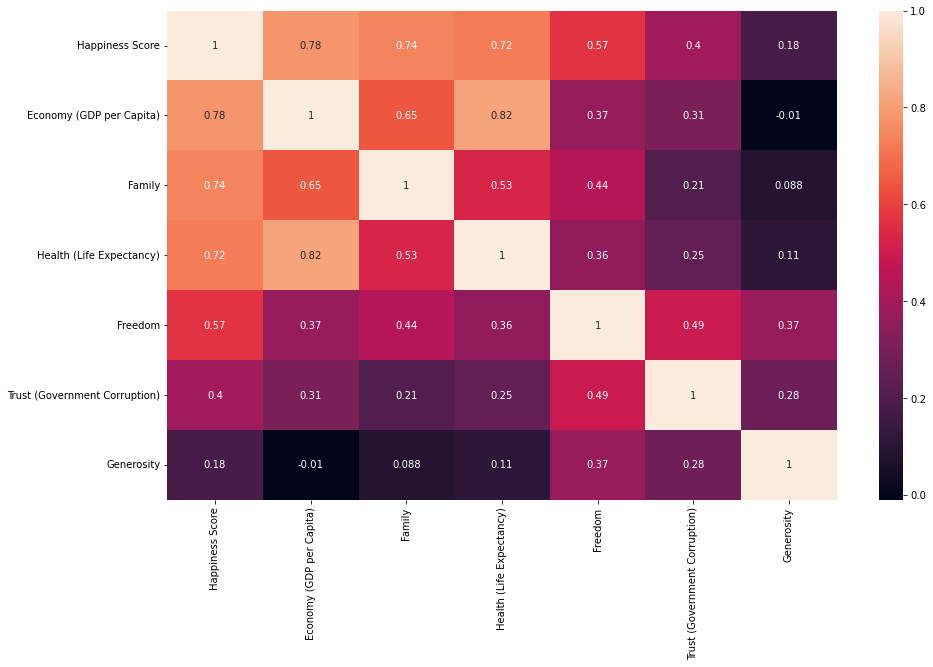

In [18]:
# Plot a heatmap using dataframe correlation values
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

From the values we can see that there is a high correlation of Economy(GDP per Capita), Family and Health(Life Expectancy) with happiness score.And a high correlation between Economy(GDP per Capita) with Health(Life Expectancy).As these increase happiness score increases. From Bivariate analysis and Multivariate analysis this can be confirmed that these variables can act as a good predictor.

### Feature Engineering

In [19]:
#converting categorical features to numerical values
categorical_cols

['Region']

In [20]:
#one hot encoding of the region column
dfRegion=pd.get_dummies(df['Region'],prefix="Region")
dfRegion

,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
153,0,0,0,0,0,0,0,0,1,0
154,0,0,0,0,0,0,0,0,1,0
155,0,0,0,0,1,0,0,0,0,0
156,0,0,0,0,0,0,0,0,1,0


In [21]:
# Concatenate the original dataframe with dataframe created for region values
df=pd.concat([df,dfRegion],axis=1)
df

,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,0,0,0,0,0,0,0,0,0,1
1,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,0,0,0,0,0,0,0,0,0,1
2,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,0,0,0,0,0,0,0,0,0,1
3,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,0,0,0,0,0,0,0,0,0,1
4,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Sub-Saharan Africa,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0,0,0,0,0,0,0,0,1,0
154,Sub-Saharan Africa,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,0,0,0,0,0,0,0,0,1,0
155,Middle East and Northern Africa,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0,0,0,0,1,0,0,0,0,0
156,Sub-Saharan Africa,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,0,0,0,0,0,0,0,0,1,0


In [22]:
df.drop(columns=categorical_cols,inplace=True)
df

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,0,0,0,0,0,0,0,0,0,1
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,0,0,0,0,0,0,0,0,0,1
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,0,0,0,0,0,0,0,0,0,1
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,0,0,0,0,0,0,0,0,0,1
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0,0,0,0,0,0,0,0,1,0
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,0,0,0,0,0,0,0,0,1,0
155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0,0,0,0,1,0,0,0,0,0
156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,0,0,0,0,0,0,0,0,1,0


In [28]:
y=df['Happiness Score']

In [29]:
X=df.drop(columns=["Happiness Score"])

In [32]:
#Feature scaling
ss=StandardScaler()

In [33]:
numerical_cols[1:]

['Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity']

In [34]:
# Apply standard scaler on only relevant columns
X[numerical_cols[1:]]=ss.fit_transform(X[numerical_cols[1:]])
X

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0,0,0,0,0,0,0,0,0,1
1,1.135226,1.514458,1.289434,1.332456,-0.016480,1.575856,0,0,0,0,0,0,0,0,0,1
2,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0,0,0,0,0,0,0,0,0,1
3,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0,0,0,0,0,0,0,0,0,1
4,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,-1.552987,-0.800520,-0.818610,1.087740,3.413922,-0.087228,0,0,0,0,0,0,0,0,1,0
154,-1.392303,-2.346860,-1.263362,0.372033,-0.529210,-0.433117,0,0,0,0,0,0,0,0,1,0
155,-0.455245,-1.901086,0.372199,-1.809238,0.381419,1.856891,0,0,0,0,1,0,0,0,0,0
156,-2.067566,-2.118467,-1.649648,-2.064472,-0.357715,-0.316950,0,0,0,0,0,0,0,0,1,0


In [37]:
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
2,6.404903,Health (Life Expectancy)
0,4.795250,Economy (GDP per Capita)
14,3.683368,Region_Sub-Saharan Africa
1,2.278125,Family
3,2.072019,Freedom
15,2.043636,Region_Western Europe
5,1.768910,Generosity
4,1.647530,Trust (Government Corruption)
7,1.355366,Region_Central and Eastern Europe
10,1.298022,Region_Middle East and Northern Africa


As the VIF values are not very high there is no multicollinearity.

### Model Building

In [41]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=80)

In [42]:
X_train

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
81,0.138967,0.231575,0.268502,-0.146489,-0.004110,-1.003818,0,0,0,0,1,0,0,0,0,0
25,1.198933,1.135608,1.062145,1.239256,0.626878,0.355110,0,0,0,0,0,0,0,0,0,1
52,-0.214729,1.155497,0.124731,0.734780,-0.509820,0.832291,0,0,0,1,0,0,0,0,0,0
106,0.087081,-1.424485,0.437162,-1.104648,-0.667275,-1.369820,0,0,0,0,1,0,0,0,0,0
145,-1.395911,0.042850,-1.007368,-0.664613,-0.718339,0.843139,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,-1.463301,-0.512571,-1.457642,-0.224245,-0.126213,-0.156992,0,0,0,0,0,0,0,0,1,0
119,-2.105641,0.037399,-2.160824,-1.348499,-0.561386,0.087458,0,0,0,0,0,0,0,0,1,0
3,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0,0,0,0,0,0,0,0,0,1
50,-0.410128,-0.046540,-0.369717,0.968778,-0.463186,-0.252888,0,0,0,1,0,0,0,0,0,0


In [43]:
X_test

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
89,-0.350428,0.162479,-0.199433,1.310354,-0.172430,0.099890,0,0,0,0,0,0,1,0,0,0
94,0.080959,-0.687668,0.742975,-0.474552,-0.662678,-0.748915,0,1,0,0,0,0,0,0,0,0
55,0.749280,0.981209,0.410162,-1.432578,-1.112476,-1.669939,0,1,0,0,0,0,0,0,0,0
118,-1.441874,-0.913520,-0.981708,-1.227339,0.236751,1.778337,0,0,0,1,0,0,0,0,0,0
64,-0.088983,0.589210,0.232042,0.504643,-1.006504,-0.197932,0,0,0,1,0,0,0,0,0,0
5,1.105190,1.205183,1.050980,1.418466,2.259005,-0.029976,0,0,0,0,0,0,0,0,0,1
48,1.188580,0.829426,0.474637,0.175116,1.358740,-0.504227,0,0,0,0,1,0,0,0,0,0
2,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0,0,0,0,0,0,0,0,0,1
21,1.279039,0.334336,0.537976,1.358885,1.519538,-0.173226,0,0,0,0,1,0,0,0,0,0
73,-0.044463,0.353709,0.031144,0.249609,-1.198642,2.201829,0,0,0,0,0,0,1,0,0,0


In [44]:
y_train

81     5.192
25     6.750
52     5.878
106    4.739
145    3.781
       ...  
151    3.587
119    4.517
3      7.522
50     5.890
10     7.278
Name: Happiness Score, Length: 118, dtype: float64

In [45]:
y_test

89     5.073
94     4.959
55     5.833
118    4.518
64     5.709
5      7.406
48     5.960
2      7.527
21     6.853
73     5.399
129    4.297
28     6.575
124    4.419
29     6.574
75     5.332
23     6.798
134    4.194
49     5.948
63     5.716
111    4.677
30     6.505
100    4.867
148    3.667
57     5.824
53     5.855
14     7.119
72     5.429
153    3.465
58     5.813
60     5.770
18     6.937
45     5.987
36     6.302
37     6.298
13     7.187
42     6.123
128    4.307
61     5.759
40     6.168
157    2.839
Name: Happiness Score, dtype: float64

#### Linear Regression

In [48]:
# Fit the Linear Regression model
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [49]:
# Predict on test data
y_test_pred=lr.predict(X_test)
y_test_pred

array([5.23516883, 4.88973713, 5.32884541, 5.20077789, 6.01348344,
       6.99764985, 6.20040919, 7.25020761, 6.27241247, 5.32188535,
       4.63754348, 6.50792508, 4.59510565, 6.29662871, 5.25928306,
       6.40018251, 4.67649311, 6.03045793, 5.40944854, 4.83836346,
       5.61681261, 4.54388487, 3.89207117, 5.80157136, 5.53658309,
       7.03376516, 5.73395314, 4.8828768 , 5.65310453, 5.58631141,
       6.67464659, 5.75946247, 6.75004917, 5.42113659, 6.08743404,
       6.0236714 , 4.85372884, 4.81646319, 6.4308086 , 3.24803469])

In [50]:
# Display the mean squared error on test data
mean_squared_error(y_test,y_test_pred)

0.2297129548572754

In [51]:
# Display the R2 score on test data
r2_score(y_test,y_test_pred)

0.8066931048876441

<AxesSubplot:xlabel='Happiness Score'>

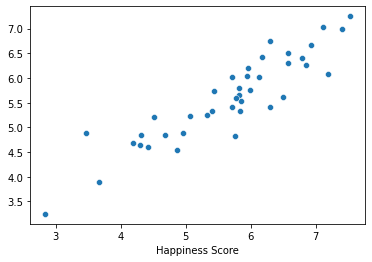

In [52]:
# Plot actual value vs predicted value to visually see how good the predictions are
sns.scatterplot(x=y_test,y=y_test_pred)

R2 score using linear regression model is 0.80. The visual representation shows the predicted value are close to the actual values.

#### Random Forest

In [53]:
# Fit the Random Forest Regressor model
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [54]:
# Predict on test data
y_test_pred=rf.predict(X_test)
y_test_pred

array([5.41614, 5.01201, 5.57667, 4.05862, 5.38342, 7.03858, 6.37587,
       7.35131, 6.24915, 4.99347, 4.76711, 6.66016, 4.12176, 6.45196,
       5.11223, 5.99257, 4.60145, 5.75699, 5.53142, 4.90207, 5.55761,
       4.75432, 4.12223, 5.54101, 5.43296, 6.93513, 6.11389, 4.16436,
       5.9171 , 5.69164, 6.73524, 6.57426, 6.85609, 5.88012, 5.83126,
       5.61695, 4.16307, 4.98826, 5.77635, 3.67447])

In [55]:
# Display the mean squared error on test data
mean_squared_error(y_test,y_test_pred)

0.23747691054499973

Mean squared error also looks less.

In [56]:
# Display the R2 score on test data
r2_score(y_test,y_test_pred)

0.8001596197878752

We do not need Random Forest model as the R2 score and MSE are similar to Linear Regression model